In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
# Basic Lib
import pandas as pd
import numpy as np
import os
import sys
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# config
import yaml

# Custom Lib
from src.eda import EDA, EDAPreprocessing
from src.loader import Loader

plt.style.use('ggplot')

rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False


In [4]:
with open("config.yaml", 'r') as config_file:
    config_dict = yaml.load(config_file, Loader=yaml.FullLoader)

In [5]:
loader_config = config_dict.get('Loader')
loader = Loader(loader_config)
loan_df = loader.run('loan_result.csv')
log_df = loader.run('log_data.csv')
user_df = loader.run('user_spec.csv')

In [6]:
loader_config = config_dict.get('Loader')

In [7]:
## diet
loan_trainer = EDAPreprocessing(loan_df)
log_trainer = EDAPreprocessing(log_df)
user_trainer = EDAPreprocessing(user_df)

loan = loan_trainer.diet_dataframe()
log = log_trainer.diet_dataframe()
user = user_trainer.diet_dataframe()

diet_dataframe 함수의 소요시간
: 9.52초
diet_dataframe 함수의 소요시간
: 13.30초
diet_dataframe 함수의 소요시간
: 2.37초


# Loan EDA

Checking Distributions...


7it [09:52, 84.70s/it]
findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.



Done!


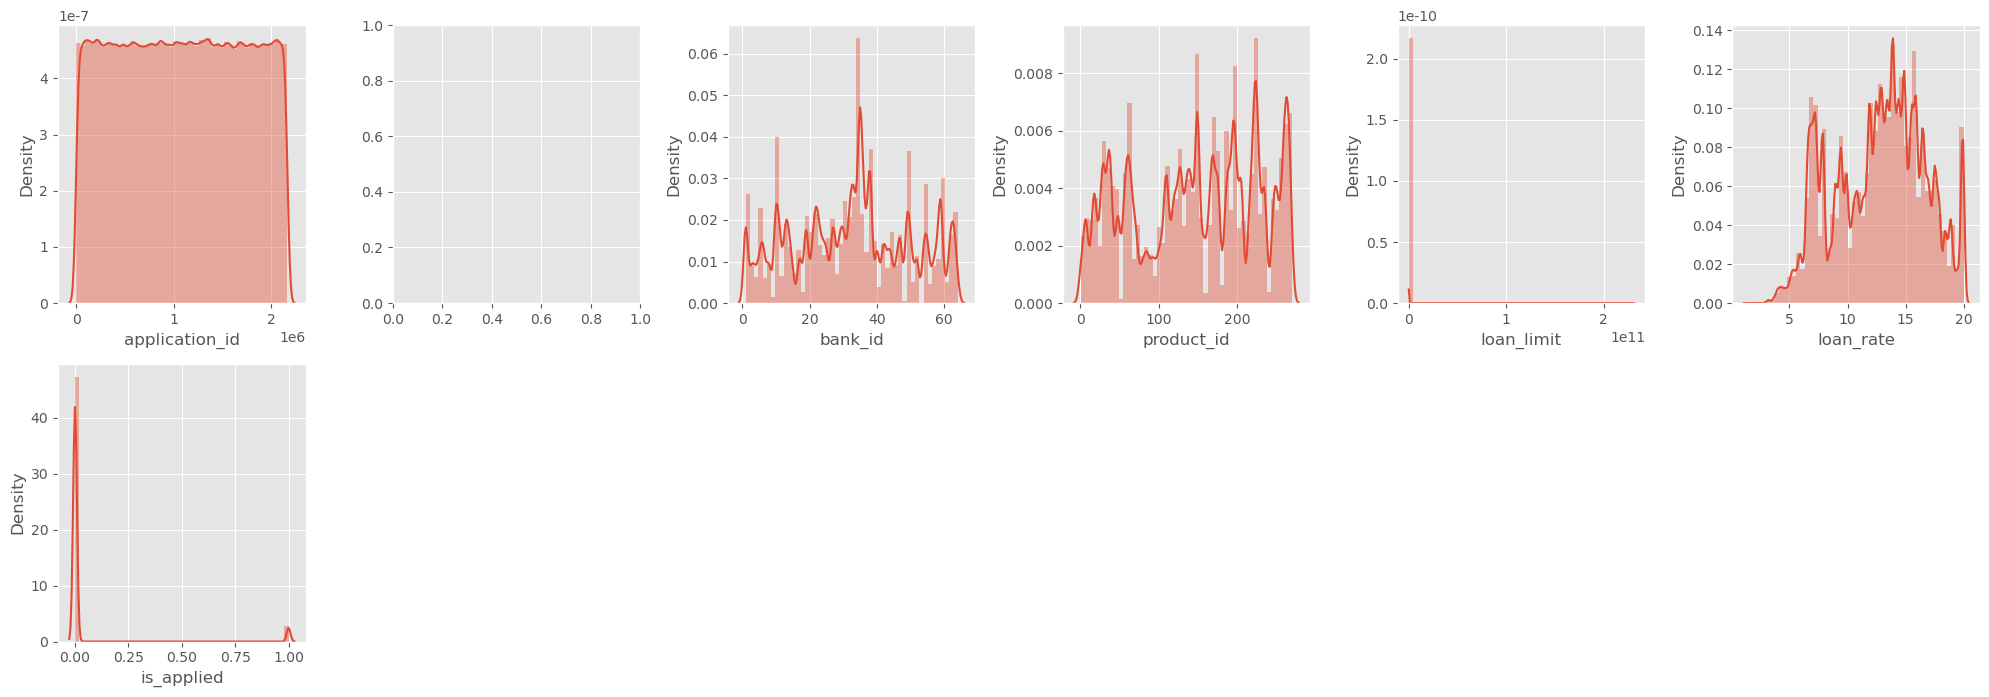

In [8]:
'''
비어있는 axes는 datetime에 대한 plot이라 공백으로 남겨뒀습니다.
'''

loan_eda = EDA(loan, 'loan_result')
loan_eda.check_distributions()

변수간 상관 관계를 확인합니다...
Done!!


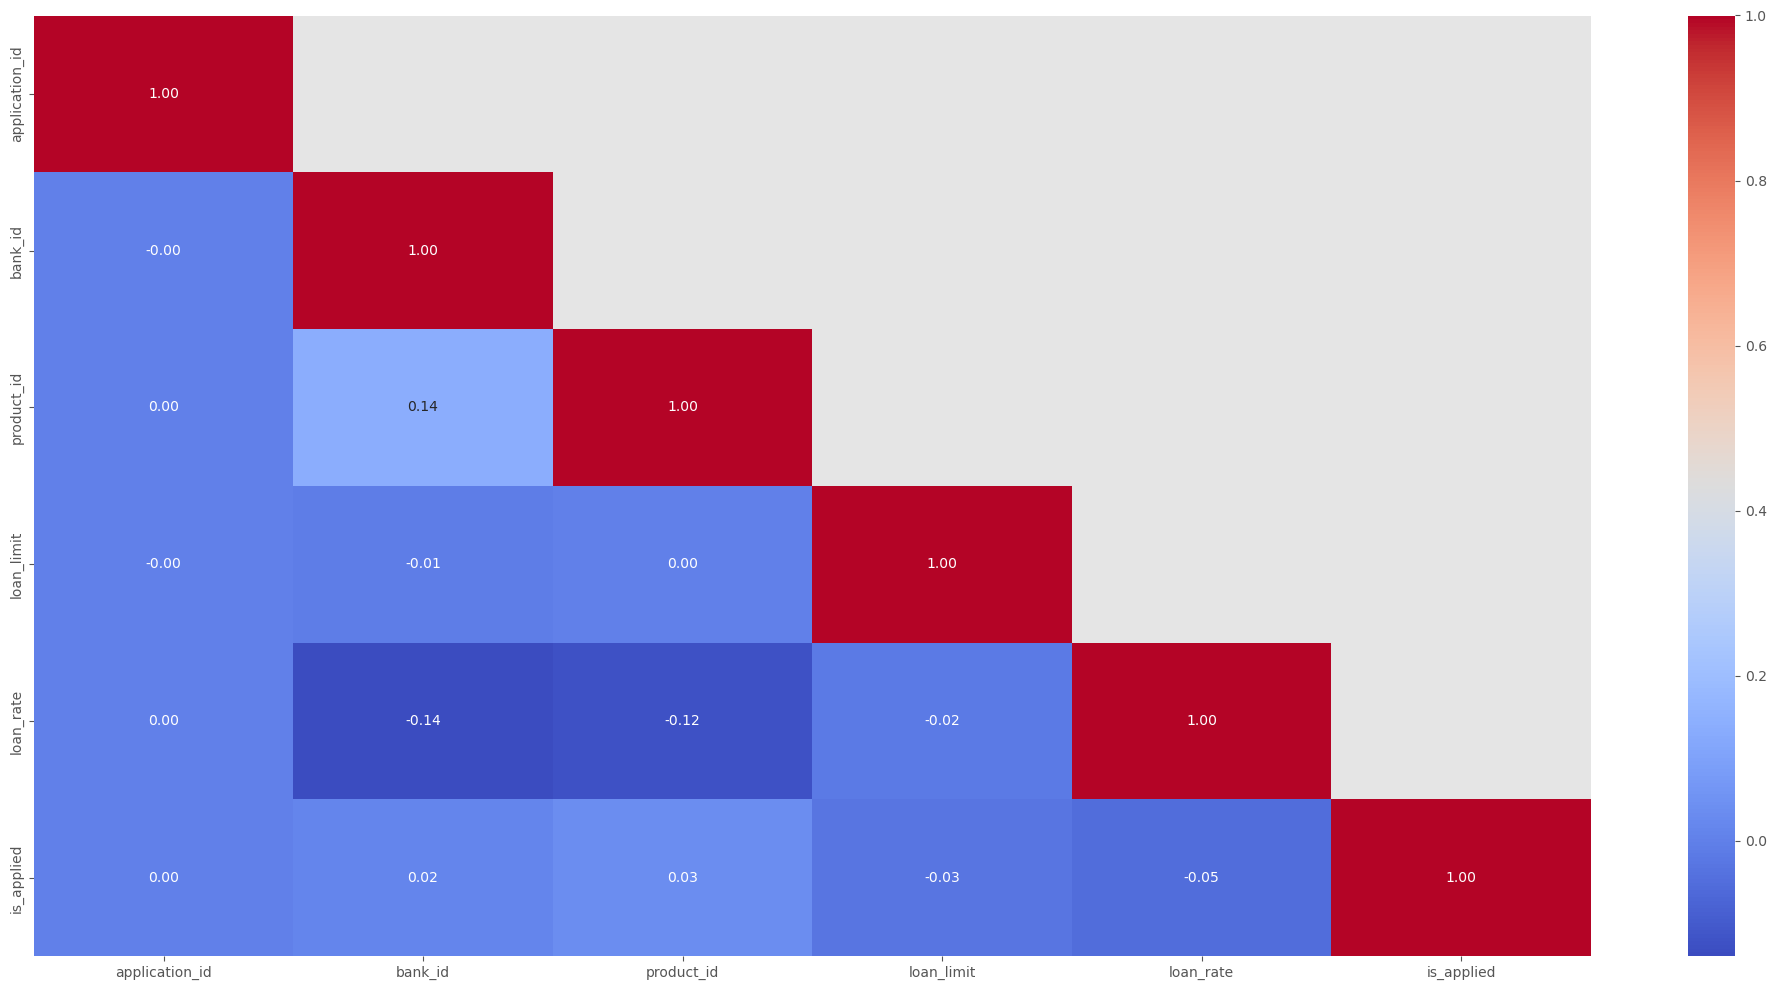

In [9]:
loan_eda.check_corr()

결측치를 확인합니다...
👀칼럼 별 결측치 수
	 ❗ application_id : 0
	 ❗ loanapply_insert_time : 0
	 ❗ bank_id : 0
	 ❗ product_id : 0
	 ❗ loan_limit : 7495
	 ❗ loan_rate : 7495
	 ❗ is_applied : 3257239


findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


Done!!


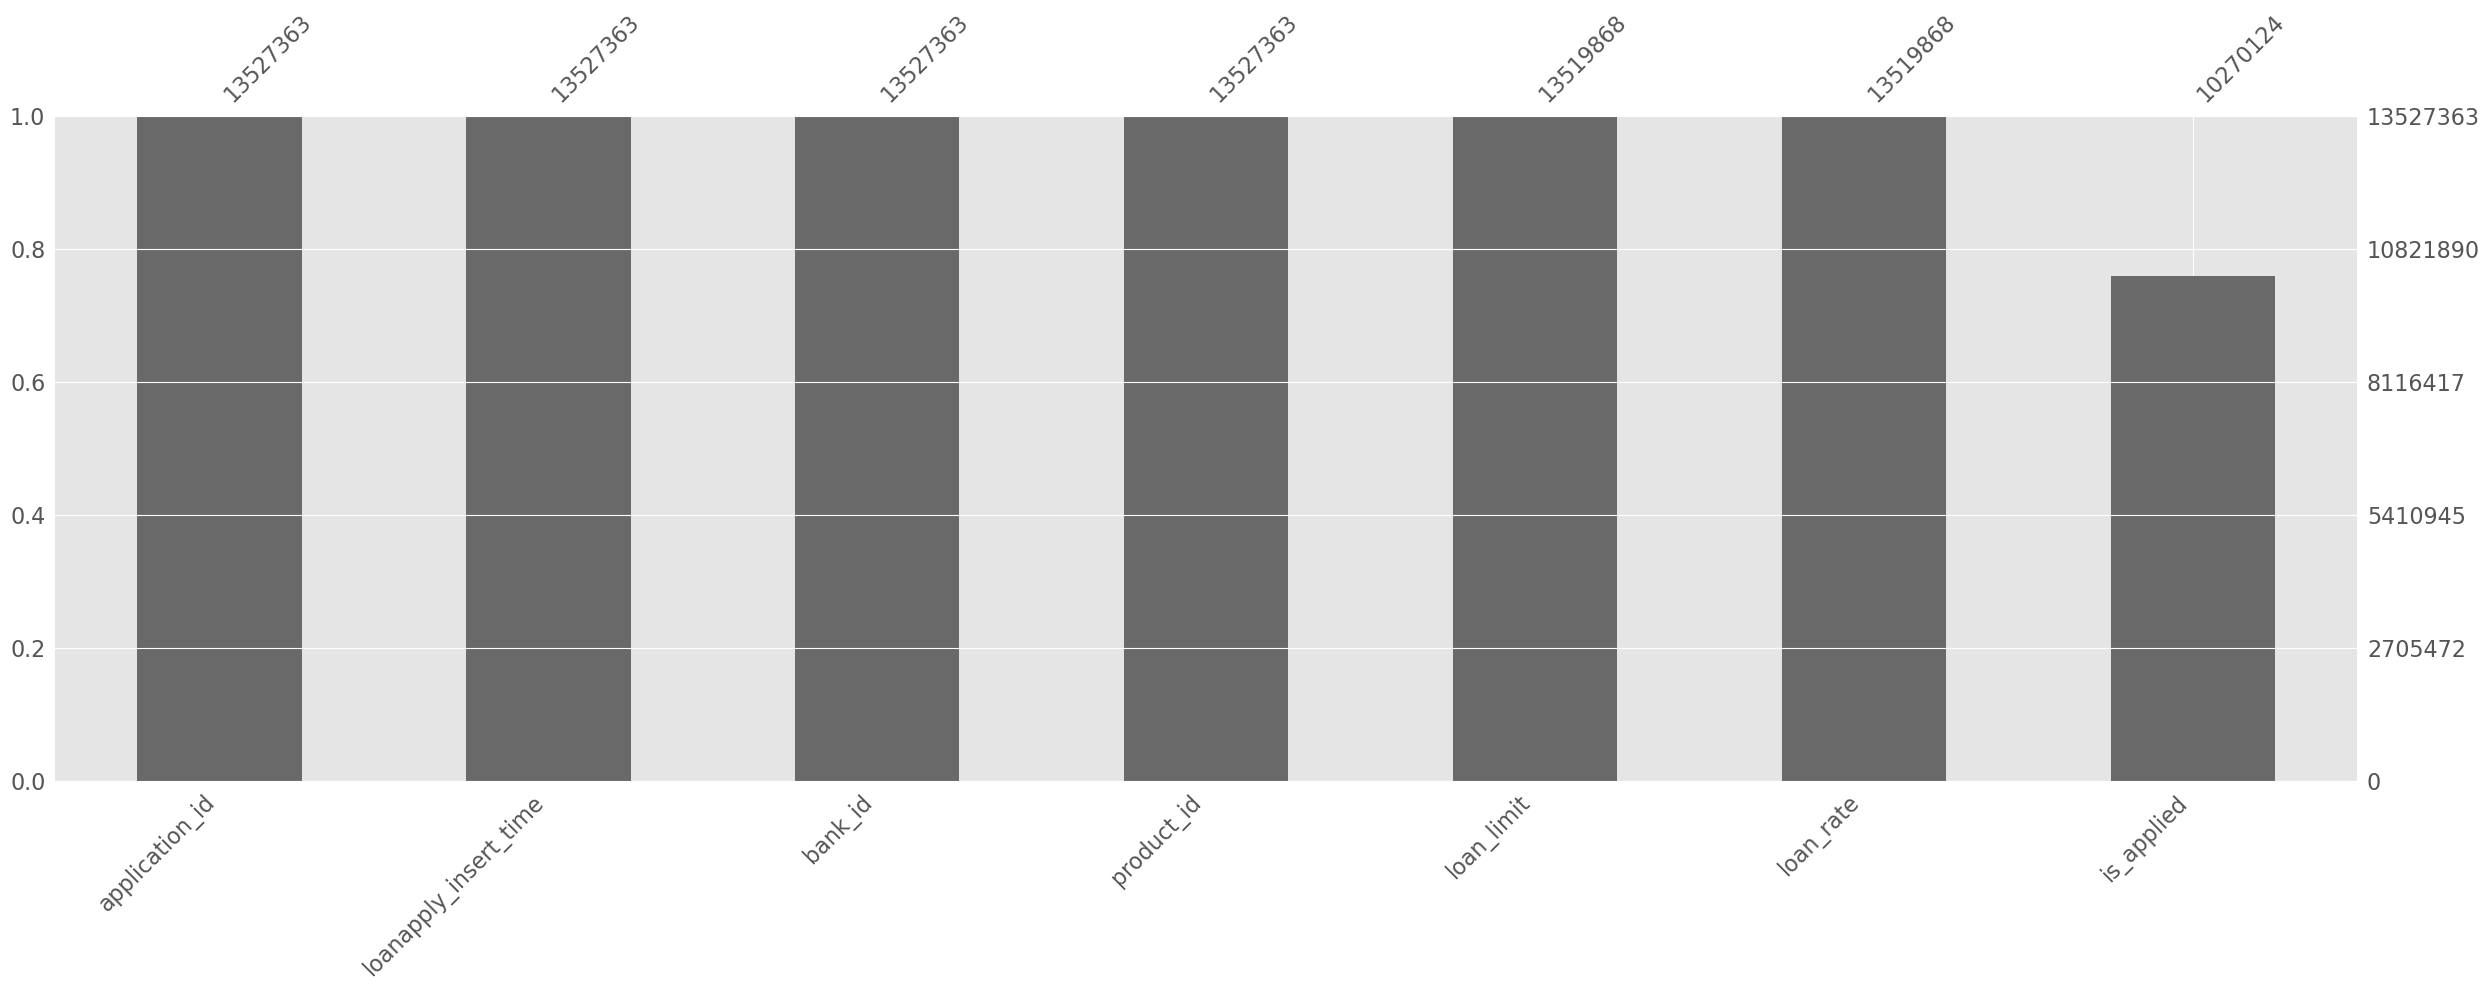

In [10]:
loan_eda.check_missing_values()

이상치를 확인합니다...
파악된 연속형 변수
 ['application_id', 'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied']
Done!!


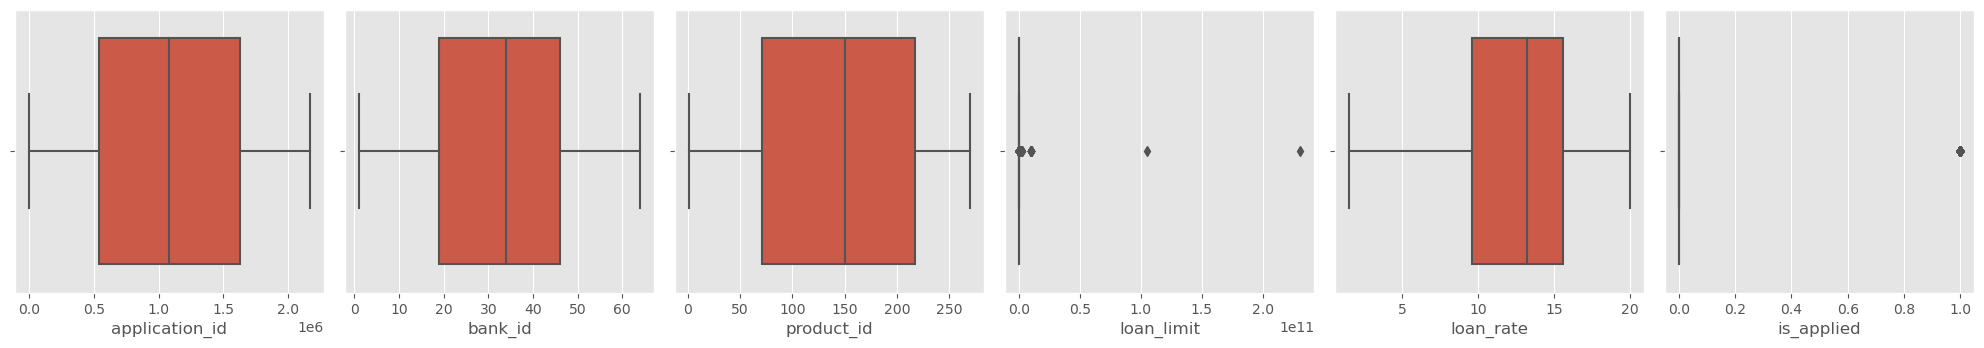

In [11]:
loan_eda.check_outliers()

# Log EDA

Checking Distributions...


6it [02:06, 21.12s/it] 

mp_app_version 칼럼은 너무 많은 범주를 가지고 있습니다. 다른 전처리를 추천드립니다.

Done!


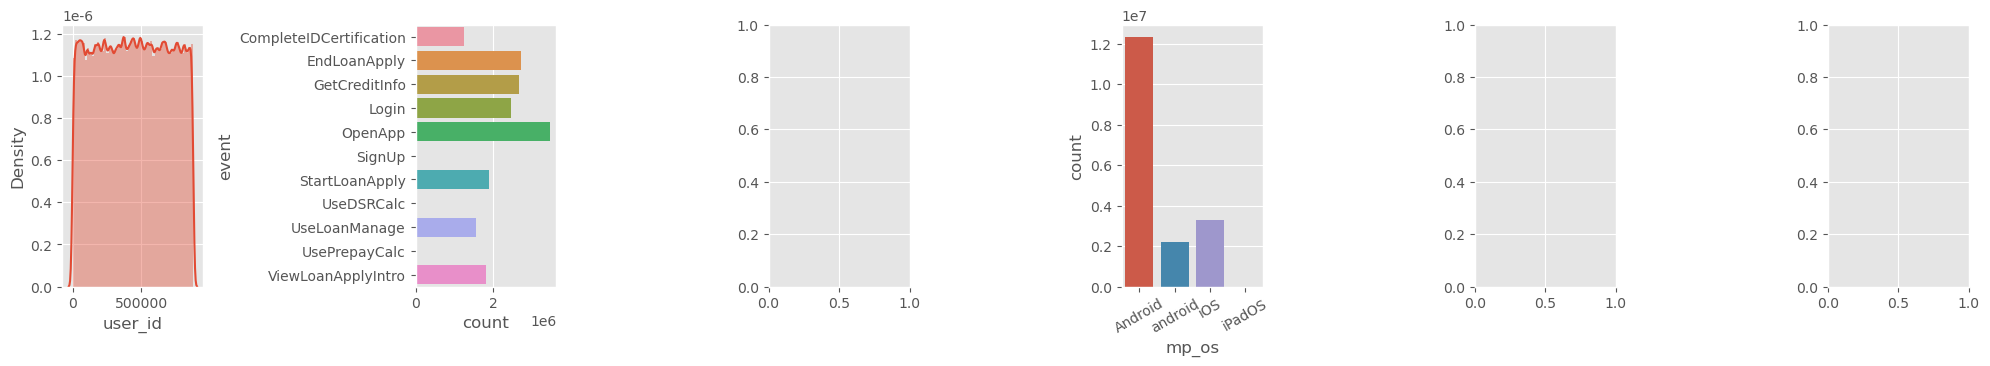

In [12]:
'''
비어있는 axes는 datetime에 대한 plot이라 공백으로 남겨뒀습니다.
'''

log_eda = EDA(log, 'log_data')
log_eda.check_distributions()

결측치를 확인합니다...
👀칼럼 별 결측치 수
	 ❗ user_id : 0
	 ❗ event : 0
	 ❗ timestamp : 0
	 ❗ mp_os : 980
	 ❗ mp_app_version : 660597
	 ❗ date_cd : 0
Done!!


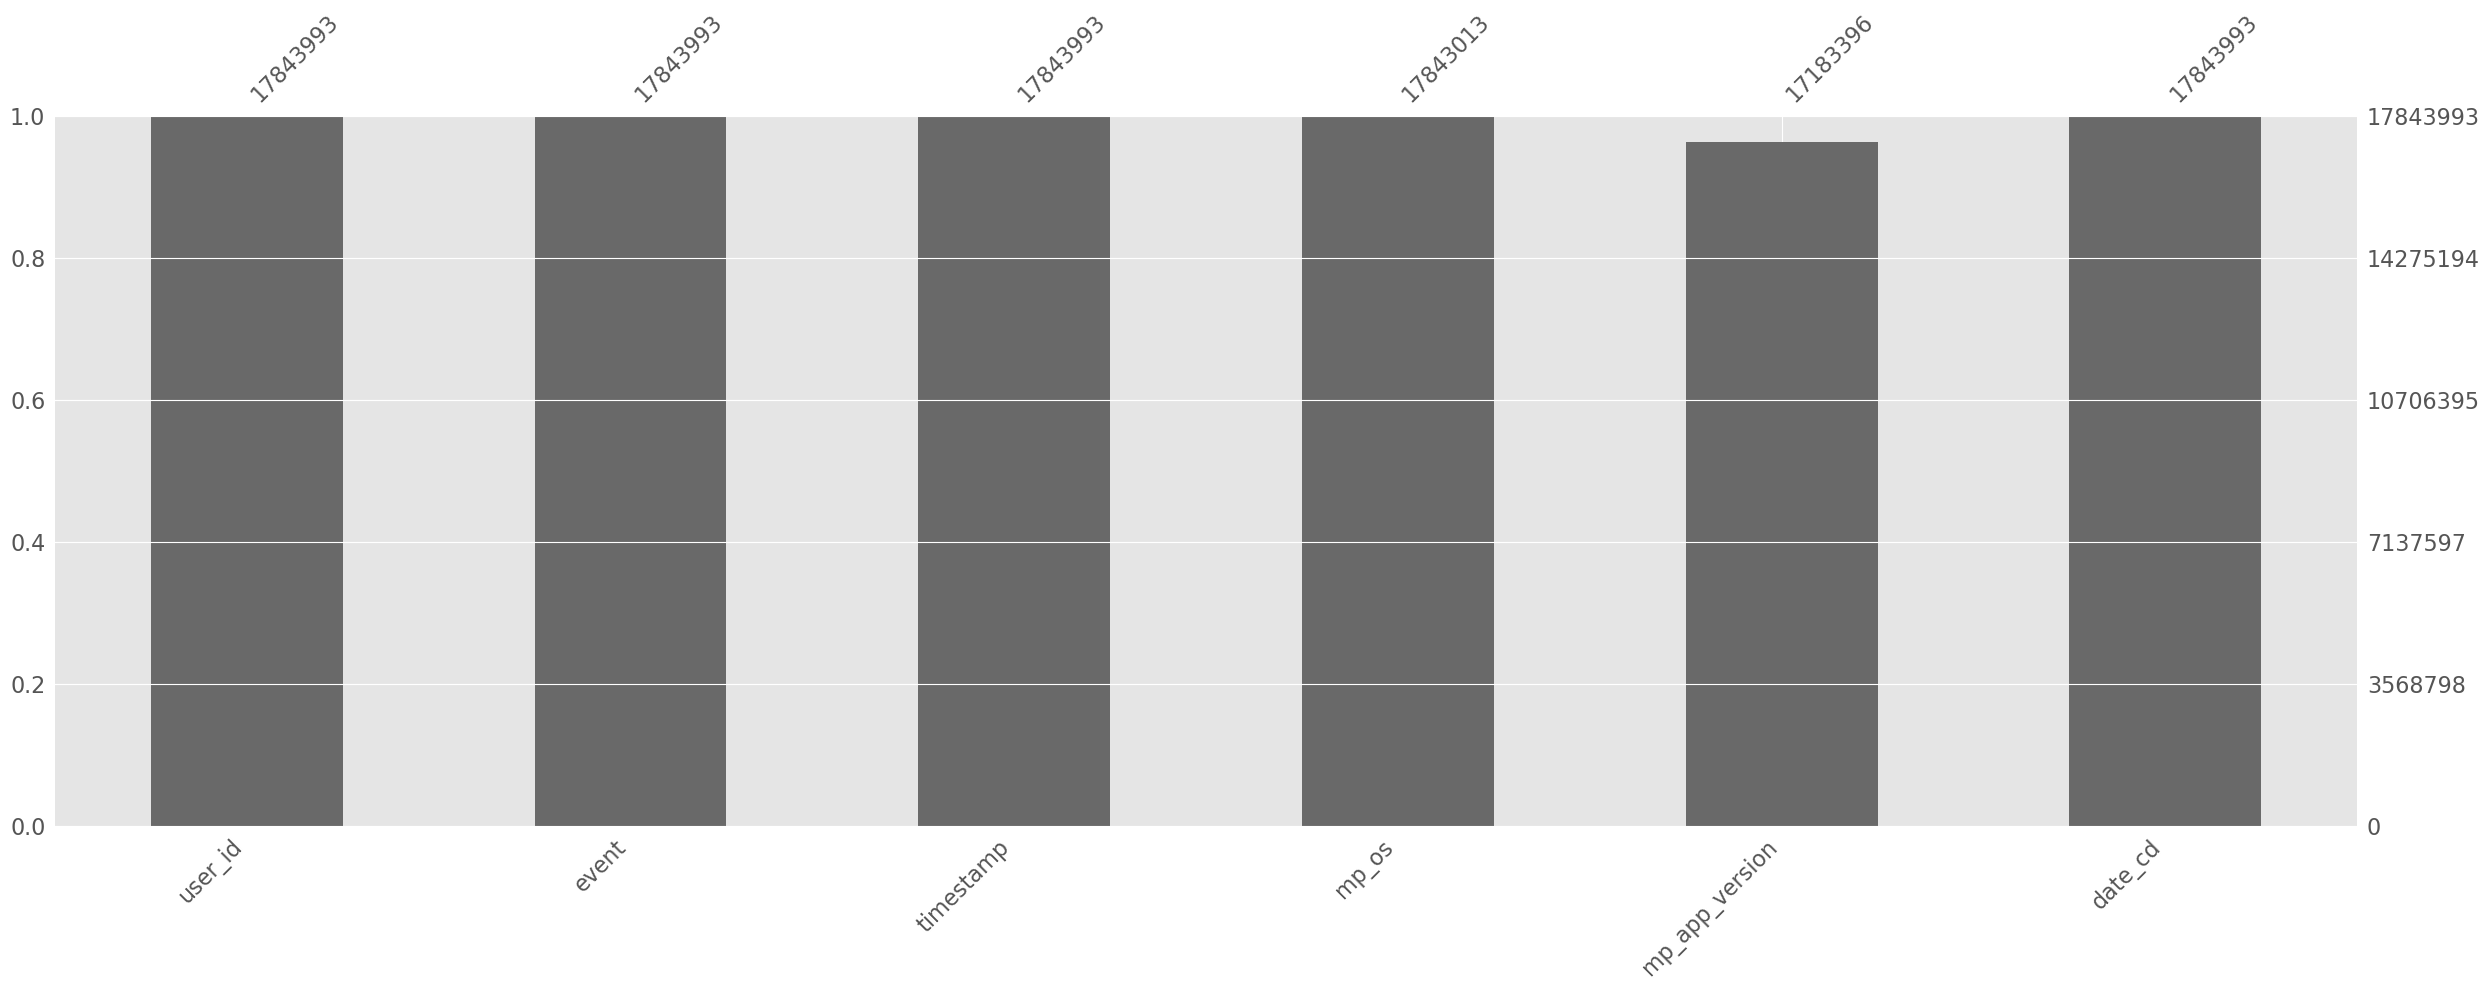

In [13]:
log_eda.check_missing_values()

이상치를 확인합니다...
파악된 연속형 변수
 ['user_id']
Done!!


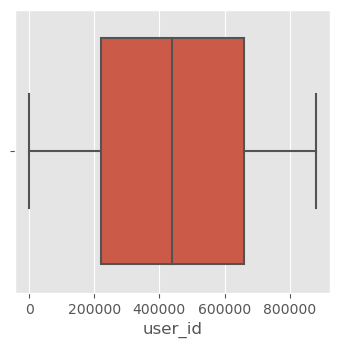

In [14]:
log_eda.check_outliers()

# User EDA

Checking Distributions...


17it [01:49,  6.43s/it]



Done!


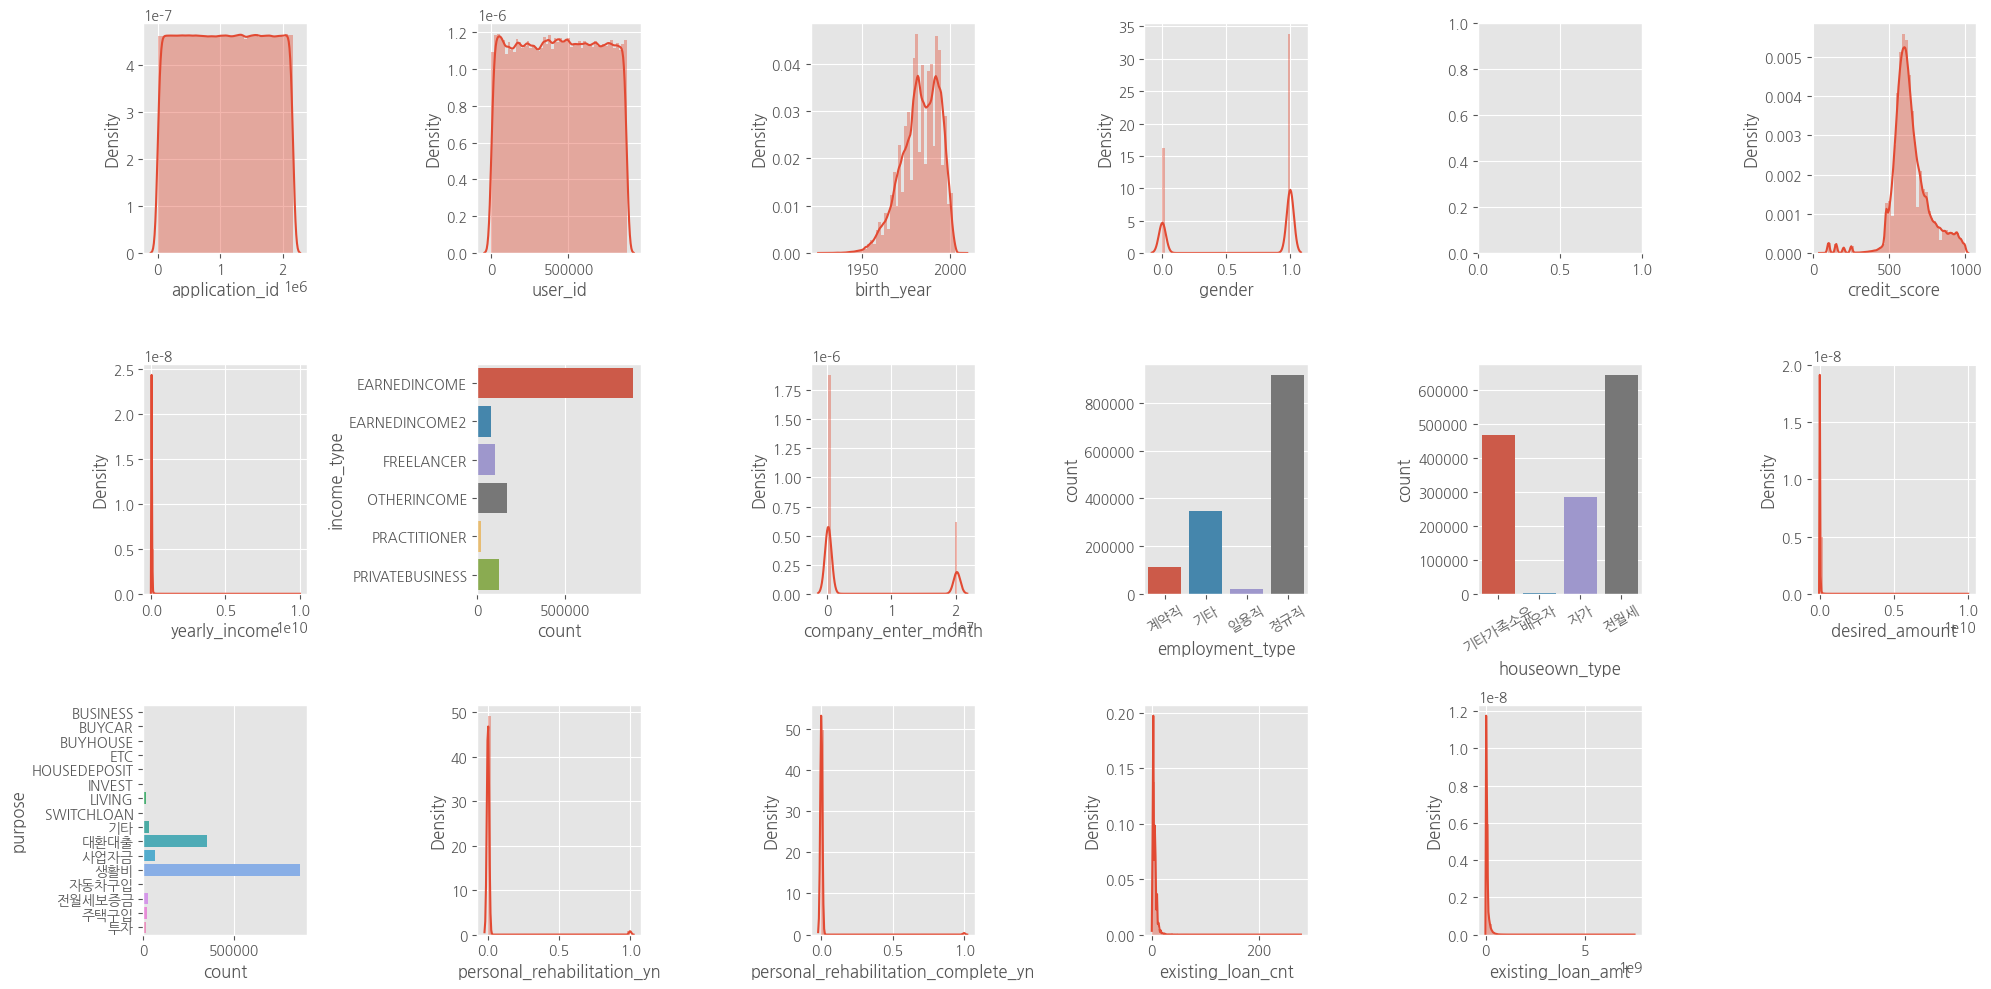

In [20]:
'''
비어있는 axes는 datetime에 대한 plot이라 공백으로 남겨뒀습니다.
'''

user_eda = EDA(user, 'user_spec')
user_eda.check_distributions()

변수간 상관 관계를 확인합니다...
Done!!


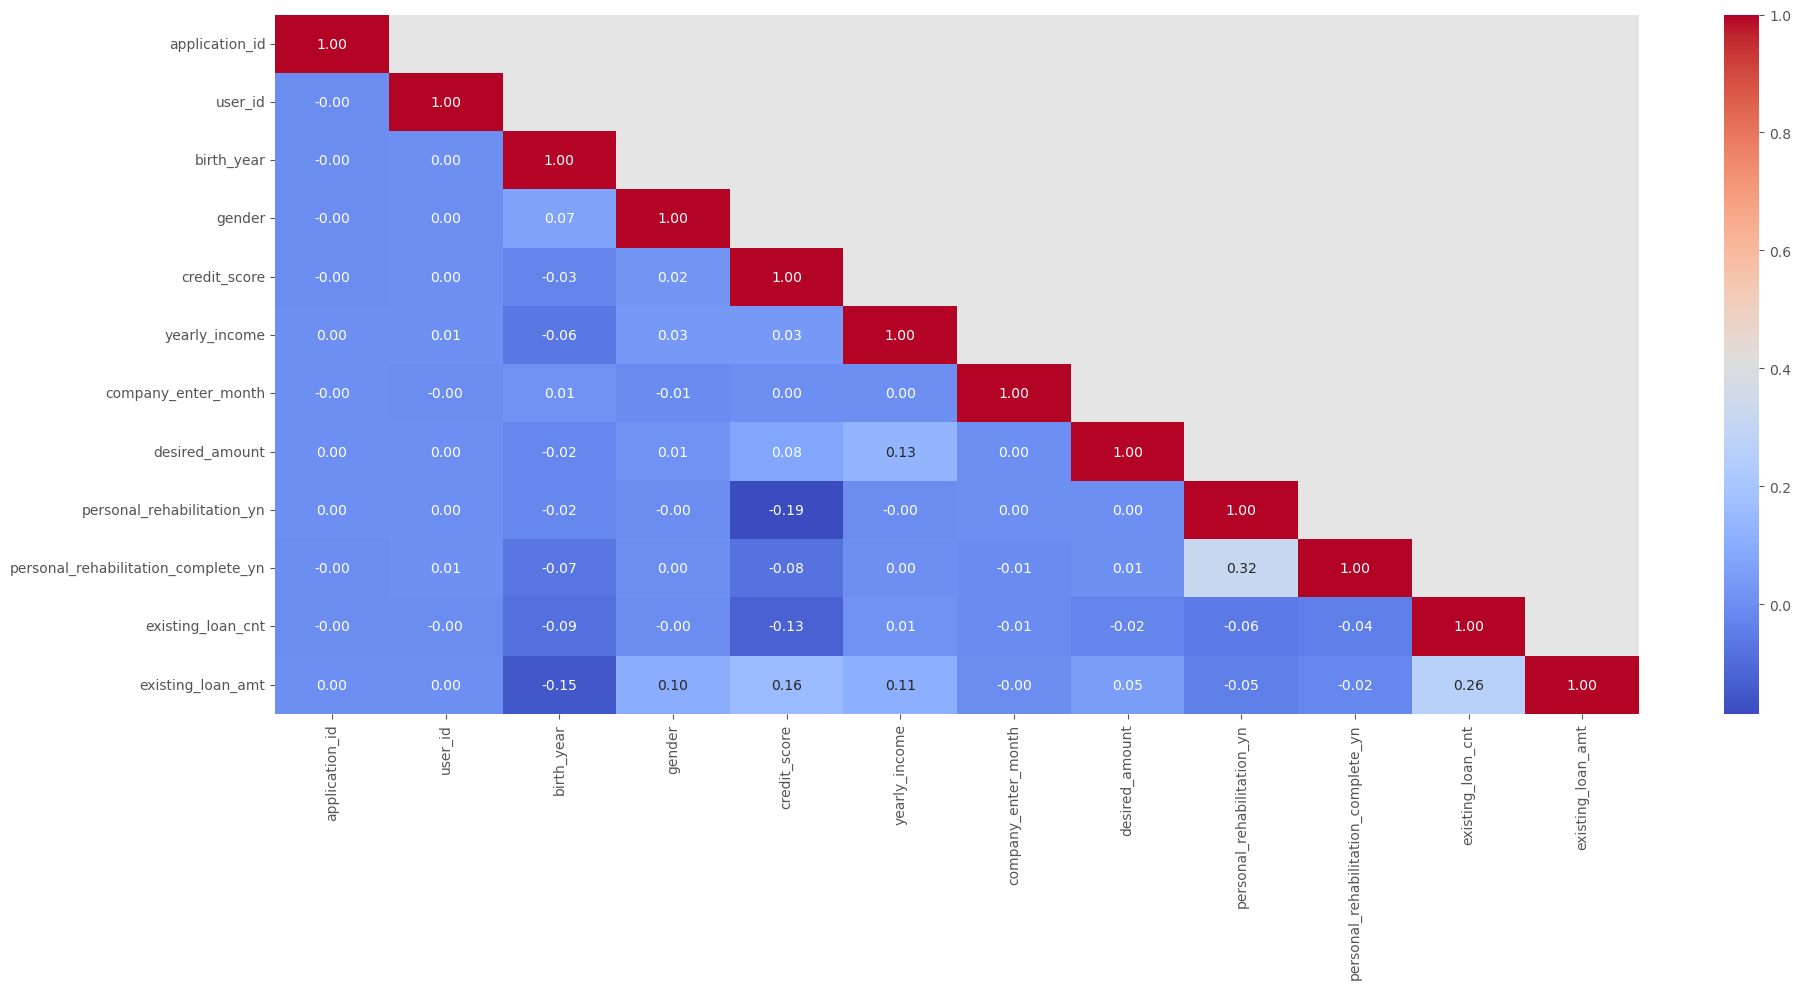

In [16]:
user_eda.check_corr()

결측치를 확인합니다...
👀칼럼 별 결측치 수
	 ❗ application_id : 0
	 ❗ user_id : 0
	 ❗ birth_year : 12961
	 ❗ gender : 12961
	 ❗ insert_time : 0
	 ❗ credit_score : 105115
	 ❗ yearly_income : 90
	 ❗ income_type : 85
	 ❗ company_enter_month : 171760
	 ❗ employment_type : 85
	 ❗ houseown_type : 85
	 ❗ desired_amount : 85
	 ❗ purpose : 85
	 ❗ personal_rehabilitation_yn : 587461
	 ❗ personal_rehabilitation_complete_yn : 1203354
	 ❗ existing_loan_cnt : 198556
	 ❗ existing_loan_amt : 313774
Done!!


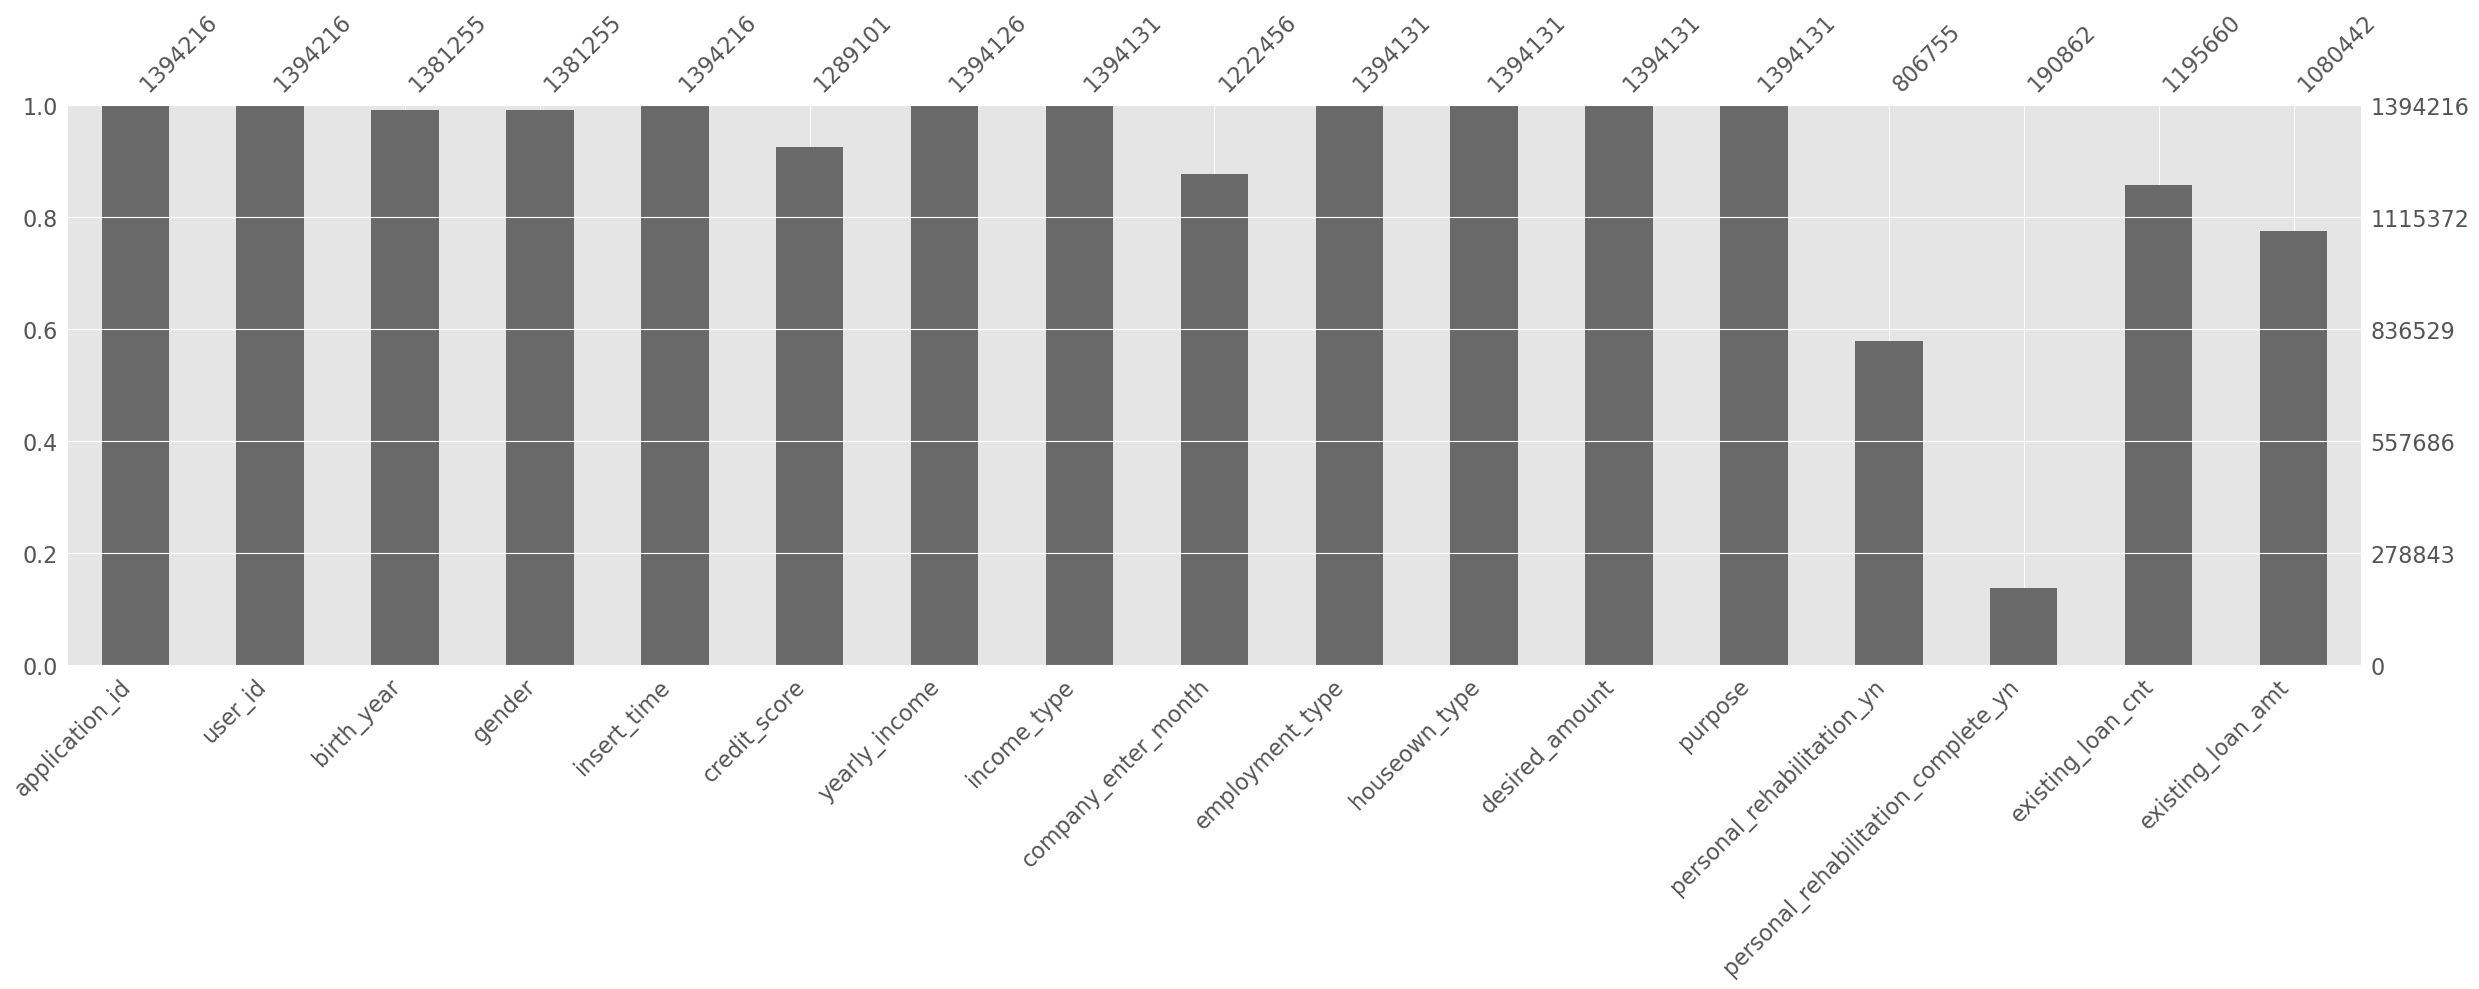

In [17]:
user_eda.check_missing_values()

이상치를 확인합니다...
파악된 연속형 변수
 ['application_id', 'user_id', 'birth_year', 'gender', 'credit_score', 'yearly_income', 'company_enter_month', 'desired_amount', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'existing_loan_cnt', 'existing_loan_amt']
Done!!


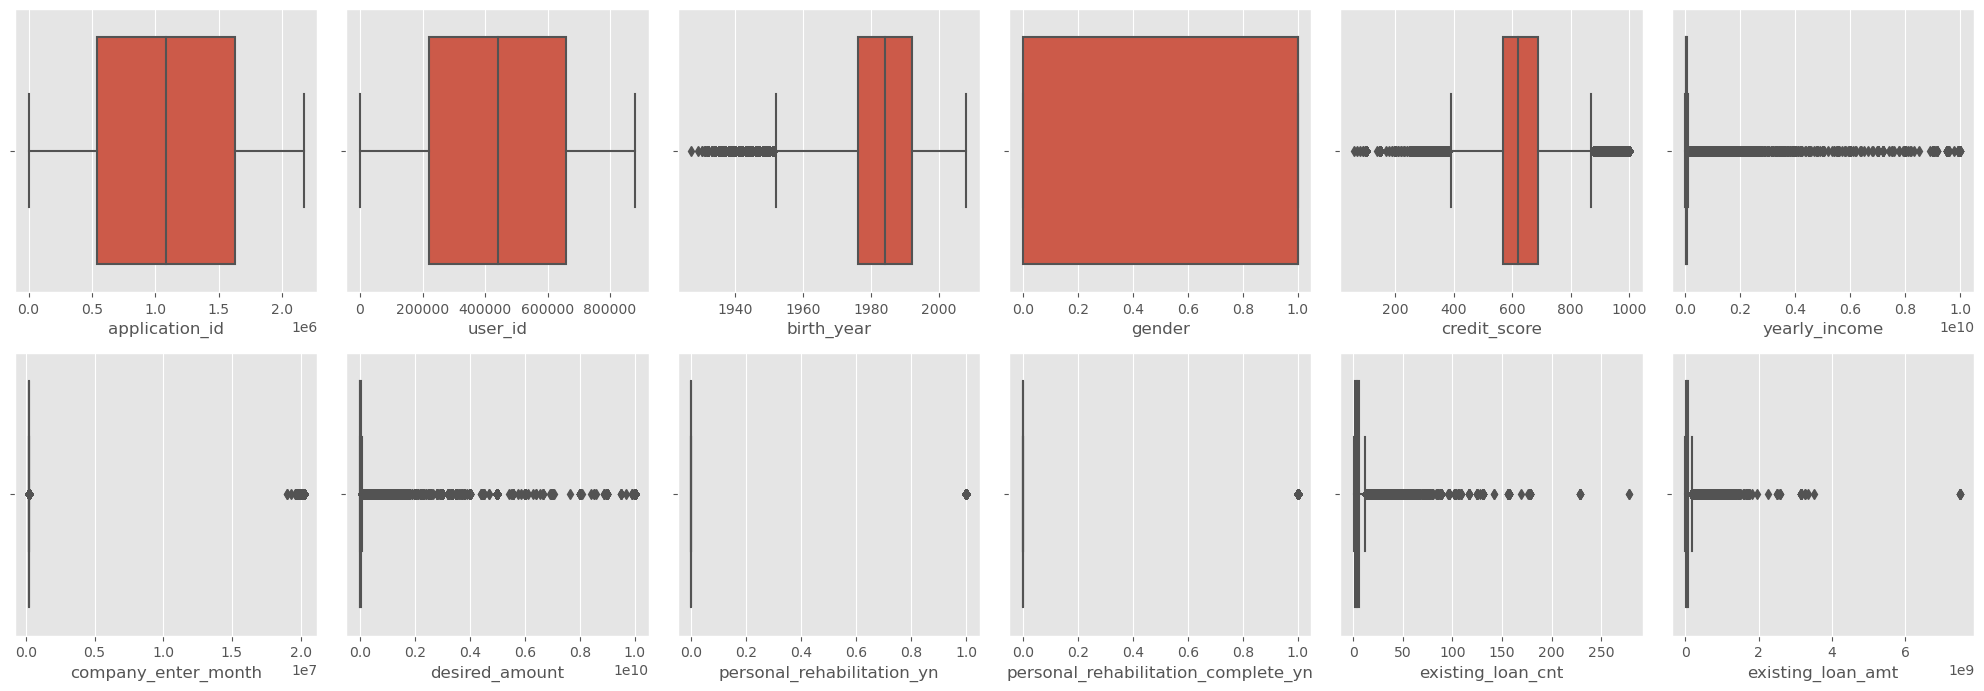

In [18]:
user_eda.check_outliers()